# Ici nous devons d'abord importer les bibliothèques nécessaires pour l'analyse

In [1]:
import numpy as np # Gestion des tableaux
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
# Importer les algorithmes de machine learning
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.linear_model import LogisticRegression # Régression Logistique
from sklearn.ensemble import RandomForestClassifier # Forêt Aléatoire
from sklearn.neural_network import MLPClassifier #Multilayer perceptron

# Chargement de la base de données (Dataset)

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head() # Affichage de cinq premières lignes de mon dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape # Dimension du data set

(768, 9)

In [5]:
# Calculer le nombre de données manquantes par colonne
Données_manquantes = dataset.isnull().sum()

# Calculer le pourcentage de données manquantes par colonne
Pourcentage =(Données_manquantes / len(dataset))* 100

# Créer un DataFrame pour afficher les résultats
missing_data_summary = pd.DataFrame({
    'Nombre de données manquantes': Données_manquantes,
    'Pourcentage (%)': round(Pourcentage, 2)
})

# Afficher le résumé des données manquantes
missing_data_summary

,Nombre de données manquantes,Pourcentage (%)
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


In [6]:
# Supprimer les lignes contenant des données manquantes
donnees_supprimees = dataset.dropna()
print(f'dimension des donnees origorinelles ; {dataset.shape}')
print(f'Dimension apres suppresion des valeurs manquantes: {donnees_supprimees.shape}')

dimension des donnees origorinelles ; (768, 9)
Dimension apres suppresion des valeurs manquantes: (768, 9)


In [7]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
dataset.describe().T  # Description des données à l'aide des paramètres statistiques

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: xlabel='Outcome', ylabel='count'>

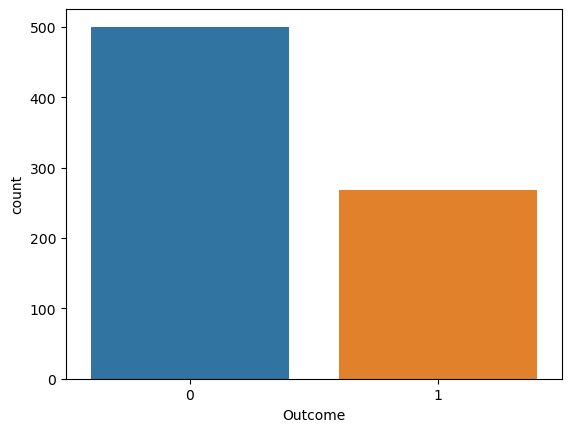

In [9]:
sns.countplot(x= 'Outcome', data=dataset)  # Visualisation des données en fonction de la variable à expliquer

In [10]:
# Mise à l'échelle des valeurs pour la normalisation et la standardisation de données

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled = sc.fit_transform(dataset)

In [12]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [13]:
dataset_scaled

,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [14]:
# Sélection des caractéristiques pour l'étude

In [15]:
X = dataset_scaled.iloc[:,[1, 3,4, 5, 6,7]].values
Y = dataset_scaled.iloc[:, 8].values

In [16]:
# Echantillonnage 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, stratify = dataset['Outcome'])

In [18]:
# Vérifions les dimensions de chaque échantillon

In [19]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (576, 6)
X_test shape: (192, 6)
Y_train shape: (576,)
X_test shape: (192, 6)


# Entrainement des nos modèles, basés sur quelques algorithmes 

In [20]:
# Réseau de neurones (Perceptron Multicouche MLP)

In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier( hidden_layer_sizes=(16, 8), 
                    activation='relu', 
                    solver='adam', 
                    alpha=0.0005,  # régularisation L2 avec un coefficient alpha
                    learning_rate='adaptive', #mise à jour du taux d'apprentissage durant l'entraînement du modèle
                    max_iter=1000, 
                    random_state=42)
mlp.fit(X_train, Y_train)
#MLPClassifier(random_state=42)

MLPClassifier(alpha=0.0005, hidden_layer_sizes=(16, 8),
              learning_rate='adaptive', max_iter=1000, random_state=42)

In [22]:
training_accuracy = mlp.score(X_train, Y_train)
print("Training Accuracy of MLP:", round(training_accuracy,2))

Training Accuracy of MLP: 0.8


In [23]:
Y_pred_mlp = mlp.predict(X_test)

In [24]:
# Rapport de la classification

In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_mlp))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       125
         1.0       0.67      0.58      0.62        67

    accuracy                           0.76       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192



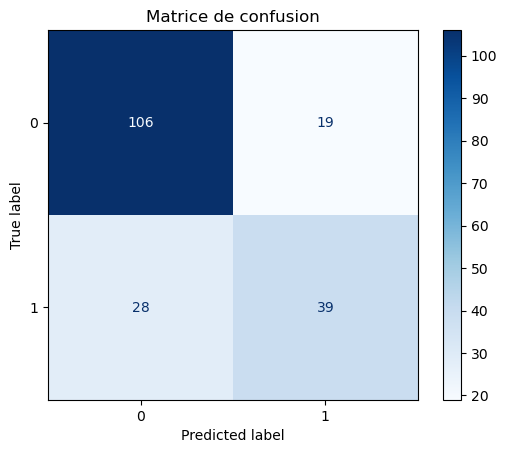

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

In [27]:
# Modèle basé sur l'Arbre de Décision

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( random_state=1)
dt.fit(X_train, Y_train)
DecisionTreeClassifier(random_state=1)

DecisionTreeClassifier(random_state=1)

In [29]:
training_accuracy = dt.score(X_train, Y_train)
print("Training Accuracy of Decision Tree:", round(training_accuracy,2))

Training Accuracy of Decision Tree: 1.0


In [30]:
Y_pred_dt = dt.predict(X_test)

In [31]:
# Rapport de la classification

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78       125
         1.0       0.59      0.61      0.60        67

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192



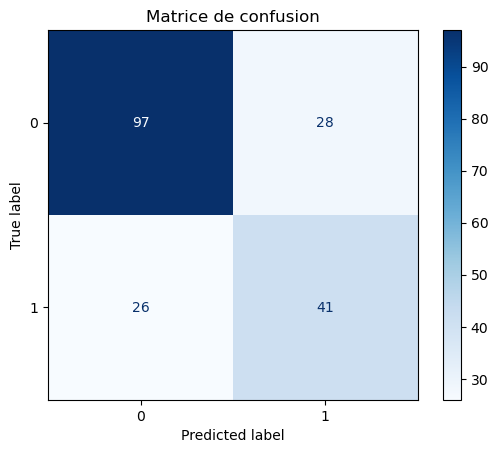

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

In [34]:
# Modèle basé sur l'algorithme de KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn= KNeighborsClassifier( n_neighbors= 1)
knn.fit(X_train, Y_train)
KNeighborsClassifier(n_neighbors= 1)

KNeighborsClassifier(n_neighbors=1)

In [36]:
training_accuracy = knn.score(X_train, Y_train)
print("Training Accuracy of Decision Tree:", round(training_accuracy,2))

Training Accuracy of Decision Tree: 1.0


In [37]:
Y_pred_knn = knn.predict(X_test)

In [38]:
# Rapport de classification pour l'algorithme KNN

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       125
         1.0       0.54      0.54      0.54        67

    accuracy                           0.68       192
   macro avg       0.64      0.64      0.64       192
weighted avg       0.68      0.68      0.68       192



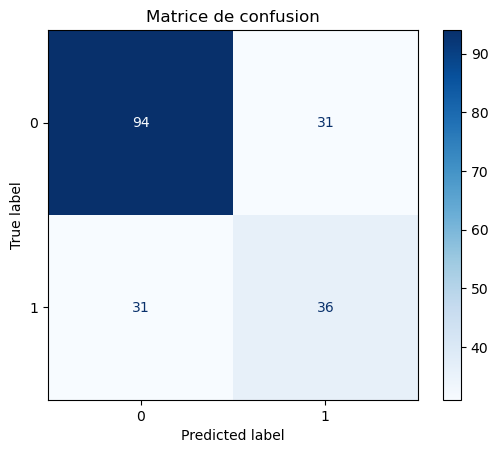

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

In [41]:
# Modèle basé sur l'algorithme de MLP avec beaucoup de paramètres

In [42]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier( hidden_layer_sizes=(16, 8), 
                    activation='relu', 
                    solver='adam', 
                    alpha=0.0005,  # régularisation L2 avec un coefficient alpha
                    learning_rate='adaptive', #mise à jour du taux d'apprentissage durant l'entraînement du modèle
                    max_iter=1000, 
                    random_state=42)
mlp.fit(X_train, Y_train)
MLPClassifier(random_state=12)

MLPClassifier(random_state=12)

In [43]:
training_accuracy = mlp.score(X_train, Y_train)
print("Training Accuracy of MLP:", round(training_accuracy,2))

Training Accuracy of MLP: 0.8


In [44]:
Y_pred_mlp = mlp.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_mlp))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       125
         1.0       0.67      0.58      0.62        67

    accuracy                           0.76       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192

